---
#### Importing the data from CSV Files:
---

In [17]:
%matplotlib inline

import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

r = pd.read_csv('ratings.csv')
tr = pd.read_csv('to_read.csv')
b = pd.read_csv('books.csv')
t = pd.read_csv('tags.csv')
bt = pd.read_csv('book_tags.csv')

---

**Question A -** What is the distribution of the number of ratings vs the average rating (in stars)? 

---

**Hypothesis B -** The number of 4-stars and 5-stars ratings would be more than 1-star and 2-stars ratings.

---

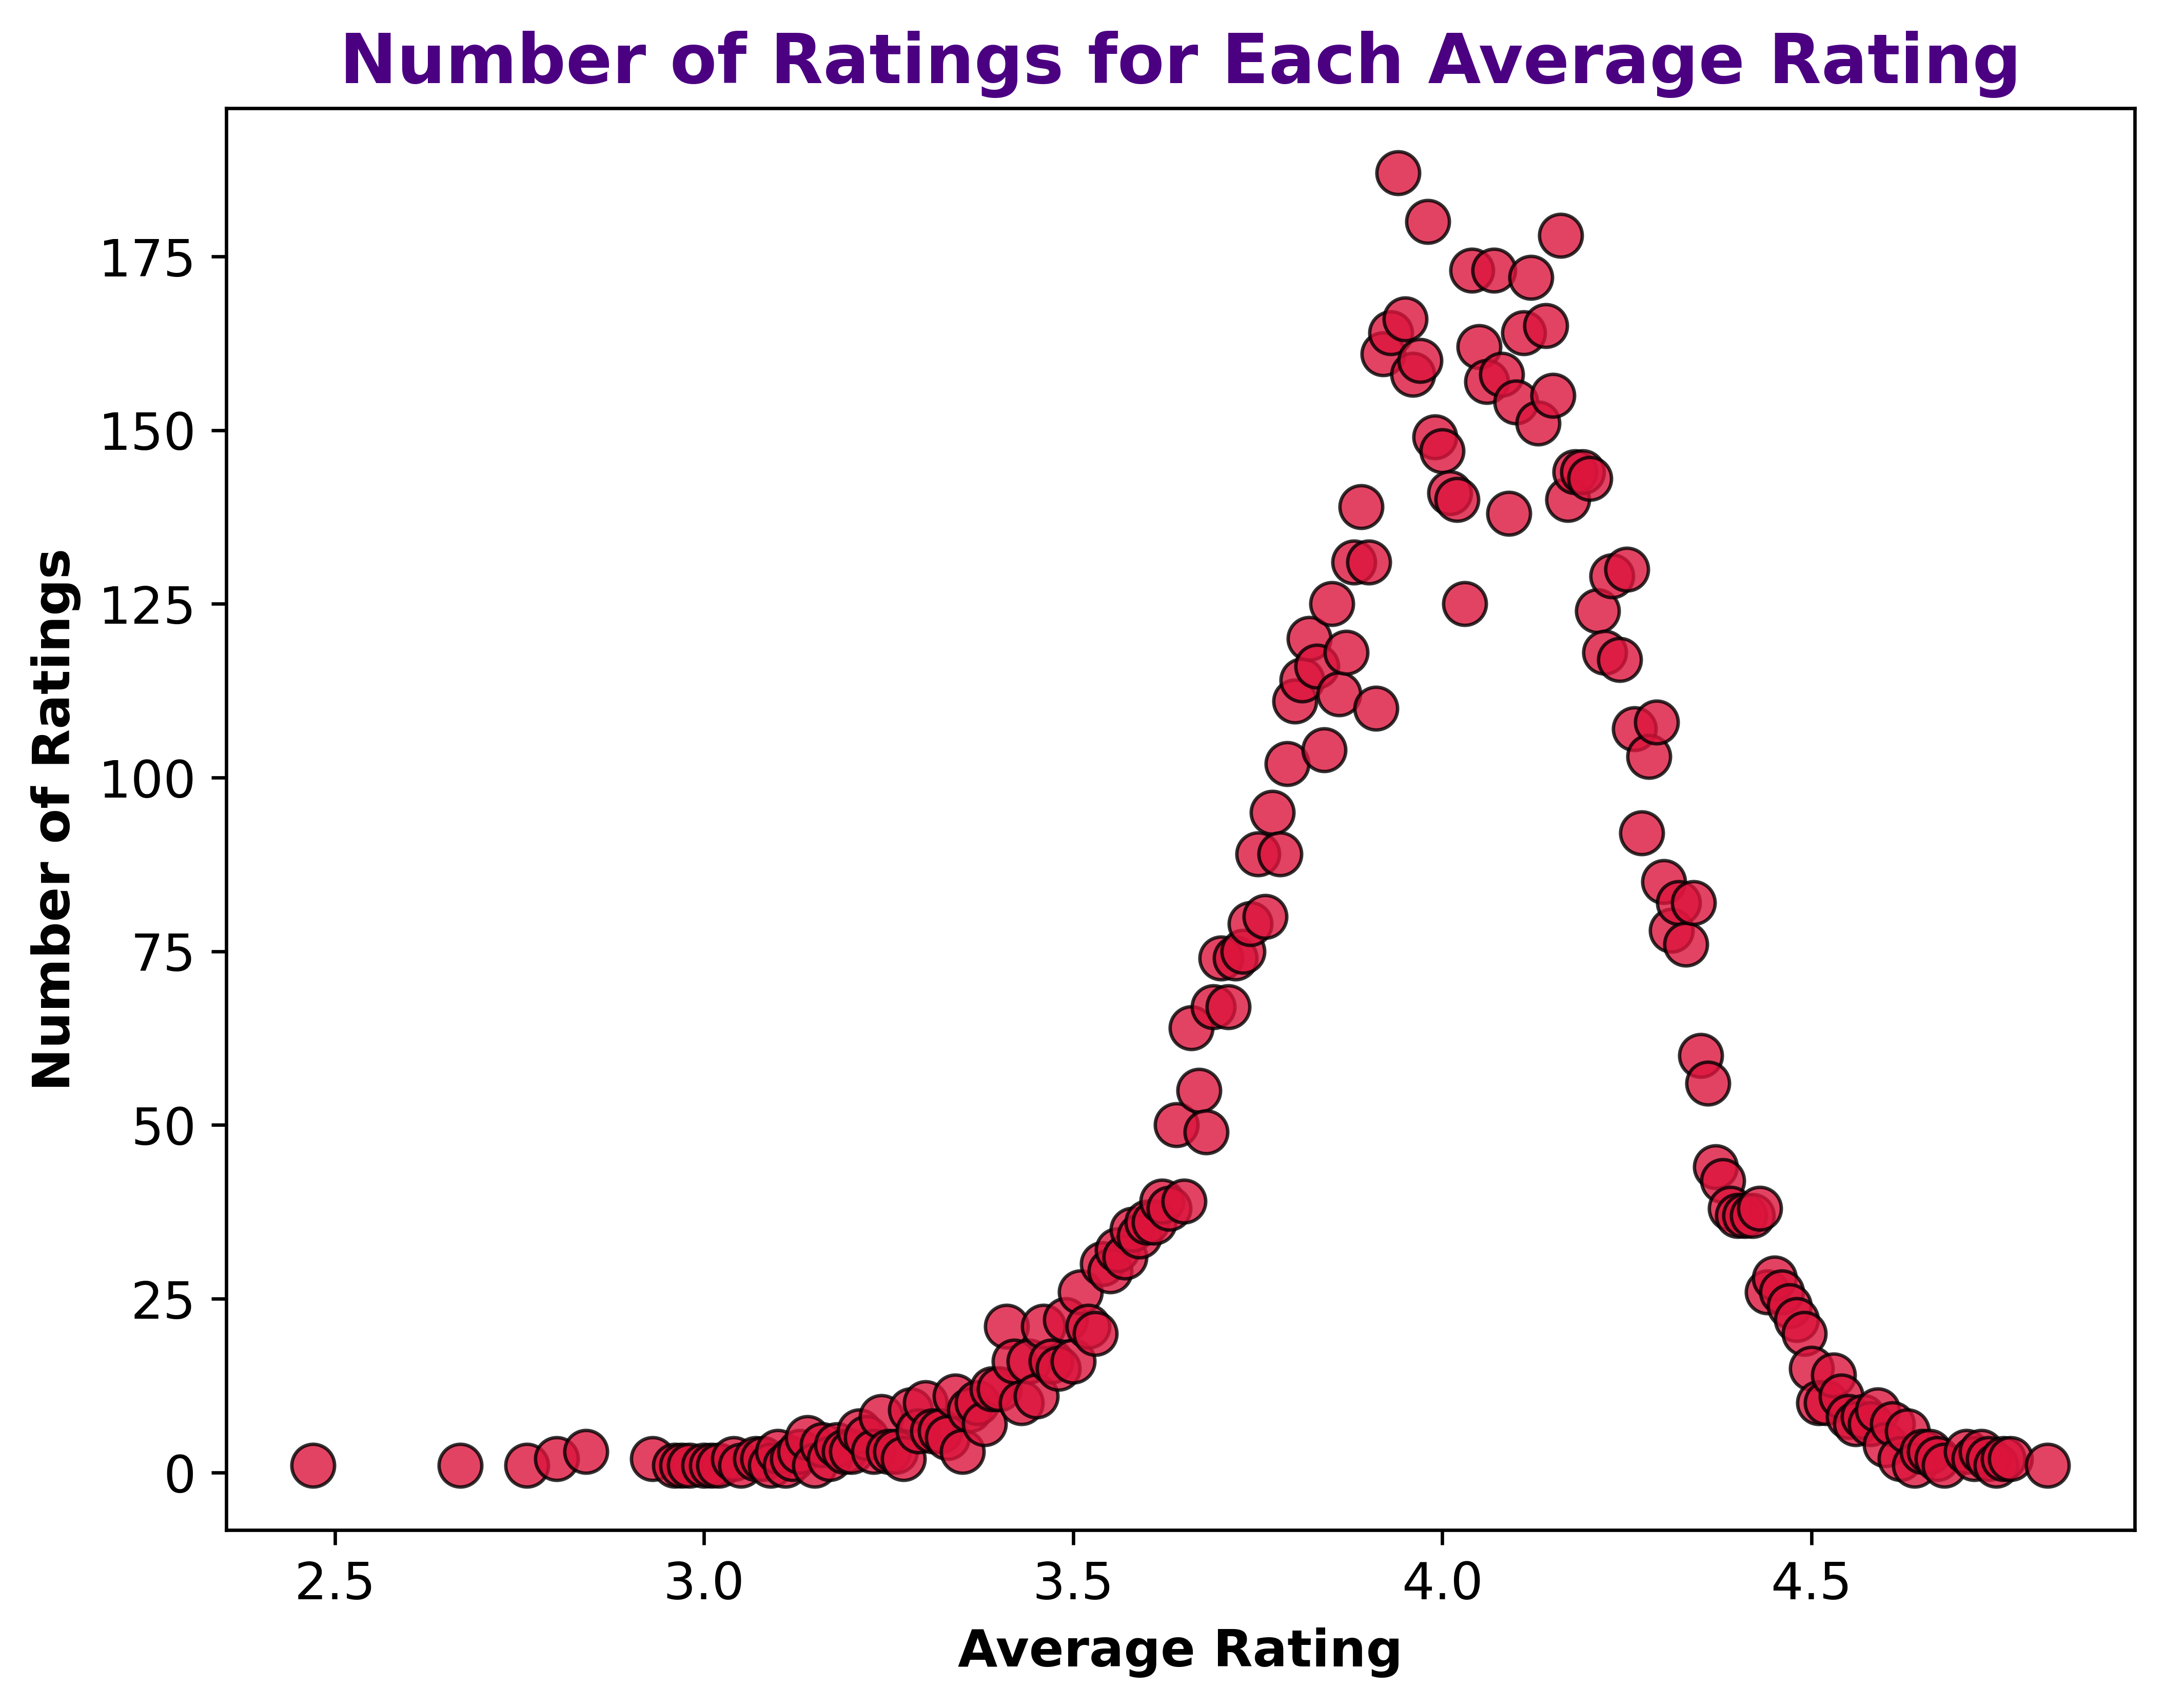

In [326]:
number_of_stars = b["average_rating"].value_counts().sort_index()
count_df = pd.DataFrame({"average_rating": number_of_stars.index, "number_of_ratings": number_of_stars})

plt.figure(figsize=(8,6))
sns.scatterplot(x="average_rating", y="number_of_ratings", data=count_df, s=100, color="crimson", edgecolor="black", alpha=0.8)
plt.title("Number of Ratings for Each Average Rating", fontsize=16, fontweight="bold", color='indigo')
plt.xlabel("Average Rating", fontsize=12, fontweight="bold")
plt.ylabel("Number of Ratings", fontsize=12, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

---

**Question C** - Is there a correlation between the number of publications by the author, the number of ratings received by the works of the author and their average rating? Are they the same set of people?

---

Text(0, 0.5, 'Number of Publications')

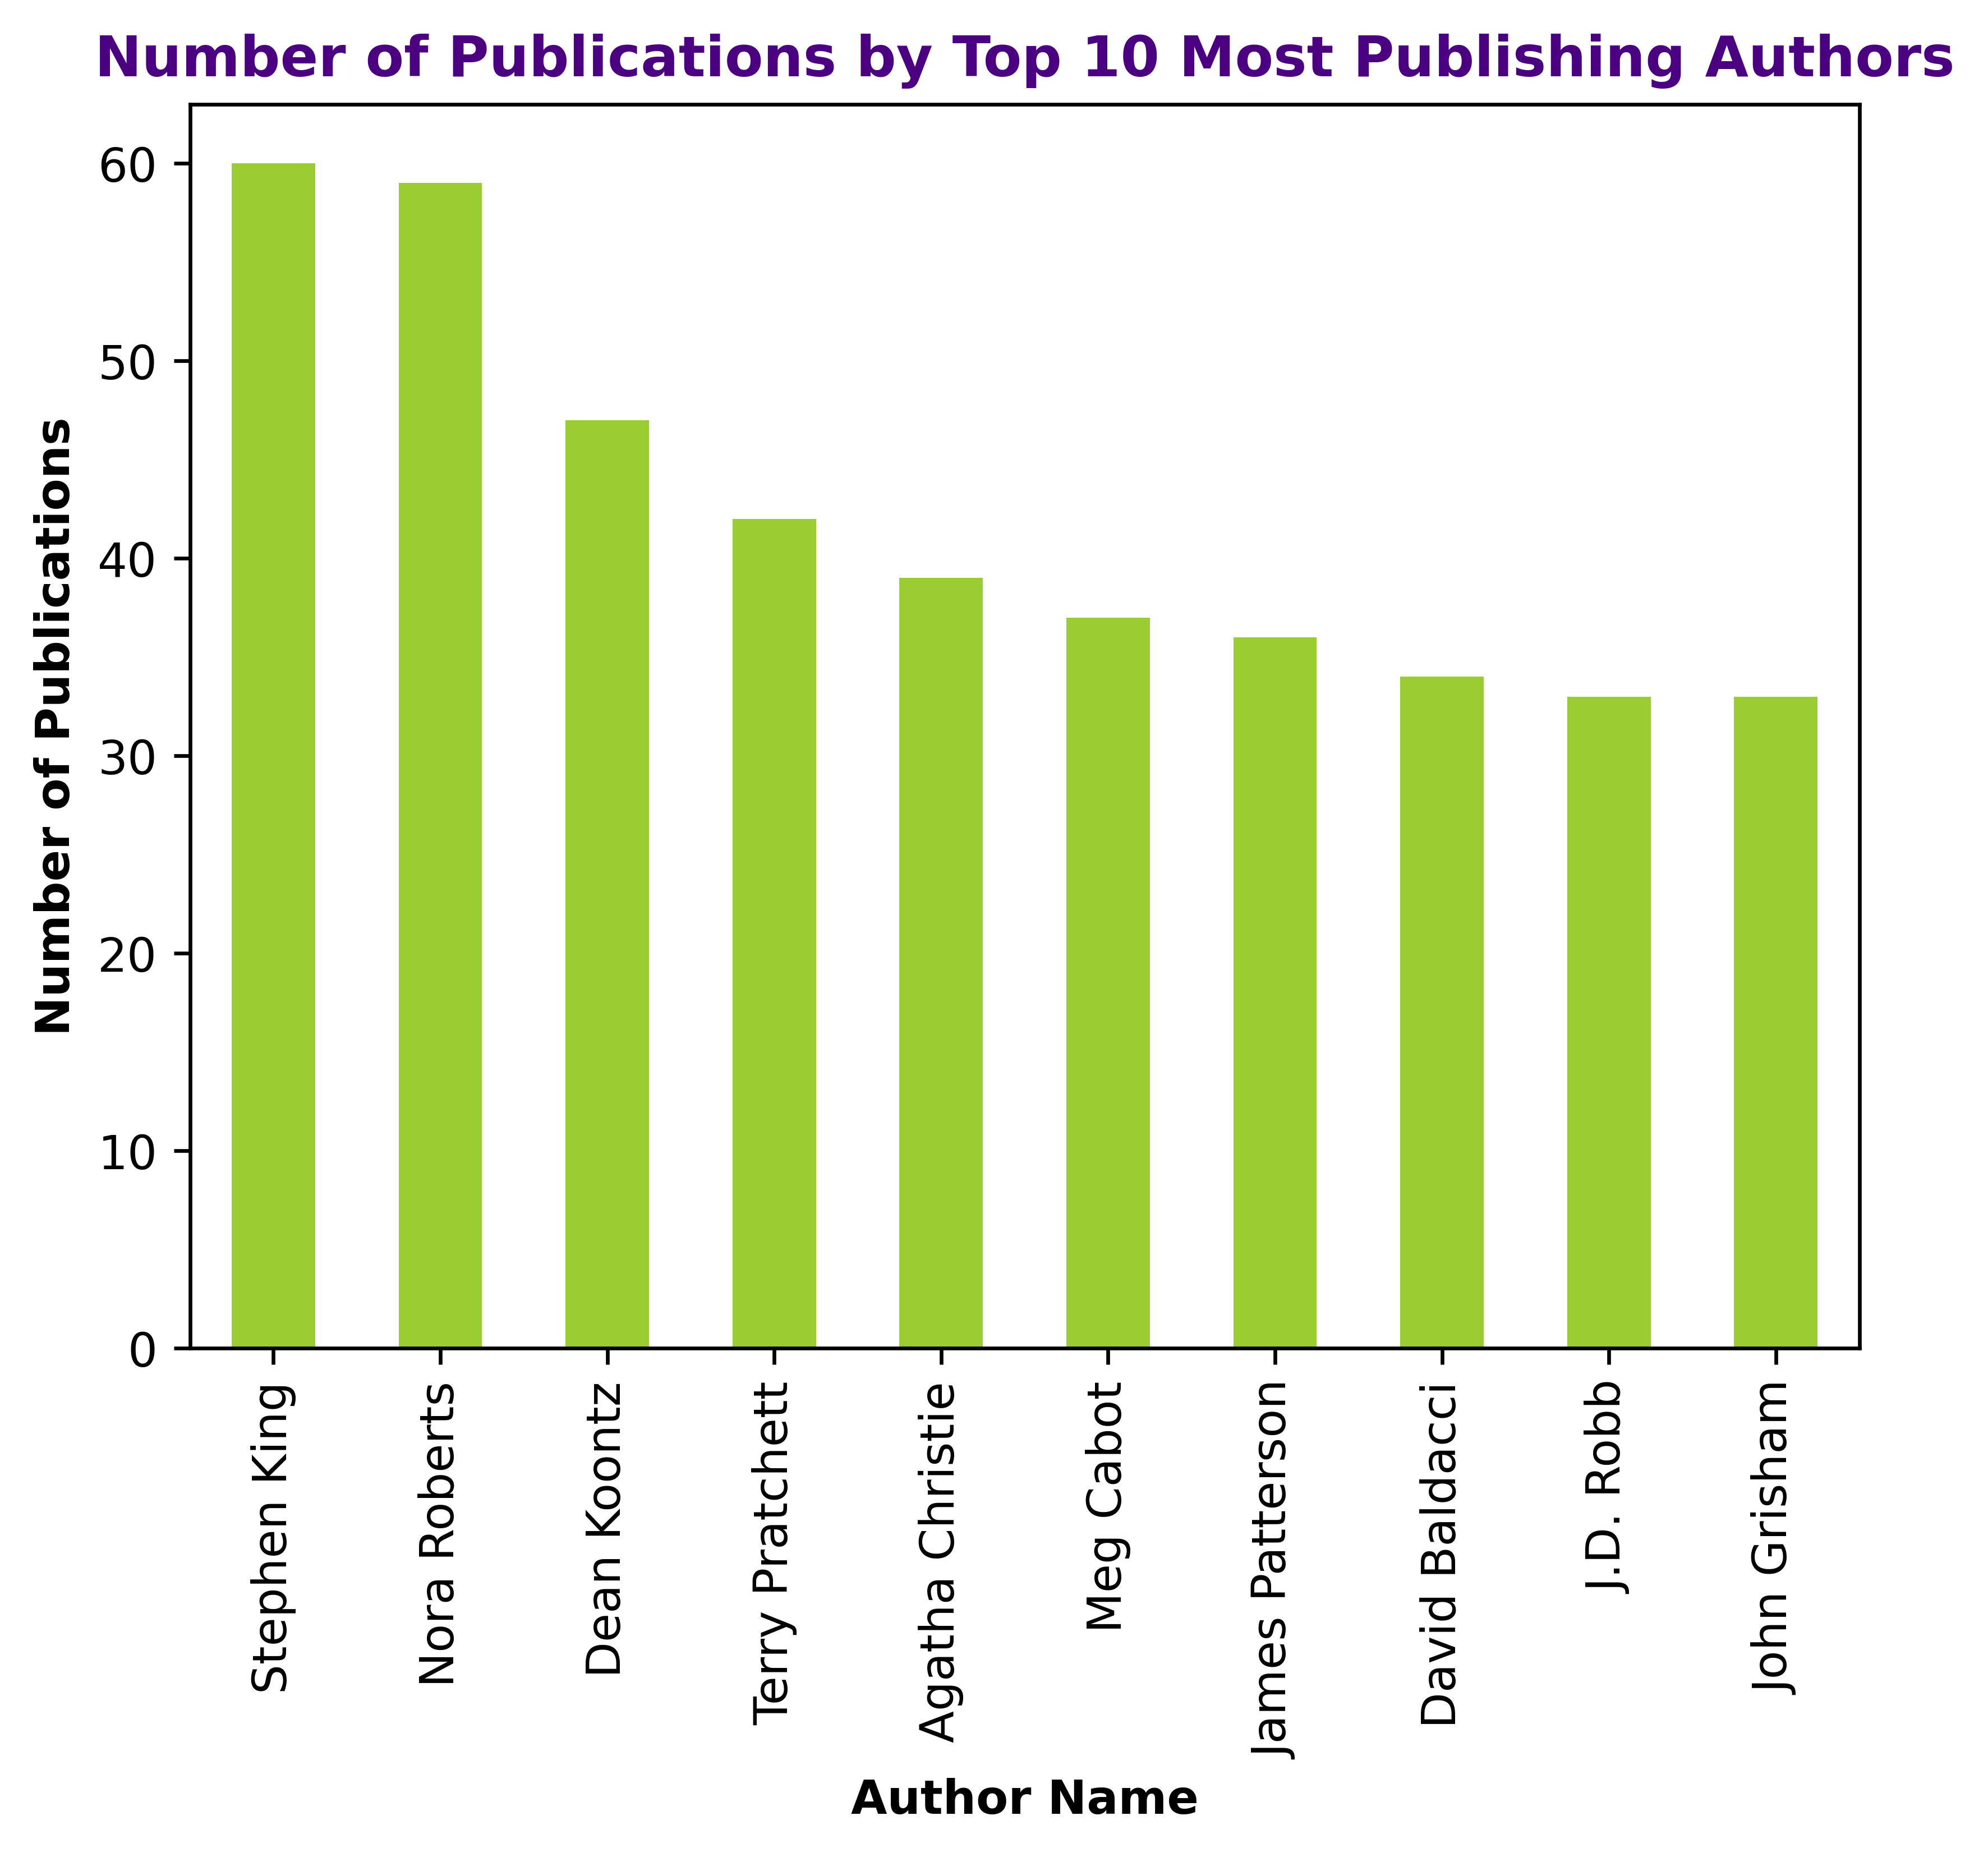

In [328]:
author_count = b["authors"].value_counts().sort_values(ascending=False)
author_count.head(10).plot(kind='bar', color='yellowgreen', rot=90)
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
plt.title("Number of Publications by Top 10 Most Publishing Authors", fontweight='bold', color='indigo')
plt.xlabel("Author Name", fontweight='bold')
plt.ylabel("Number of Publications", fontweight='bold')

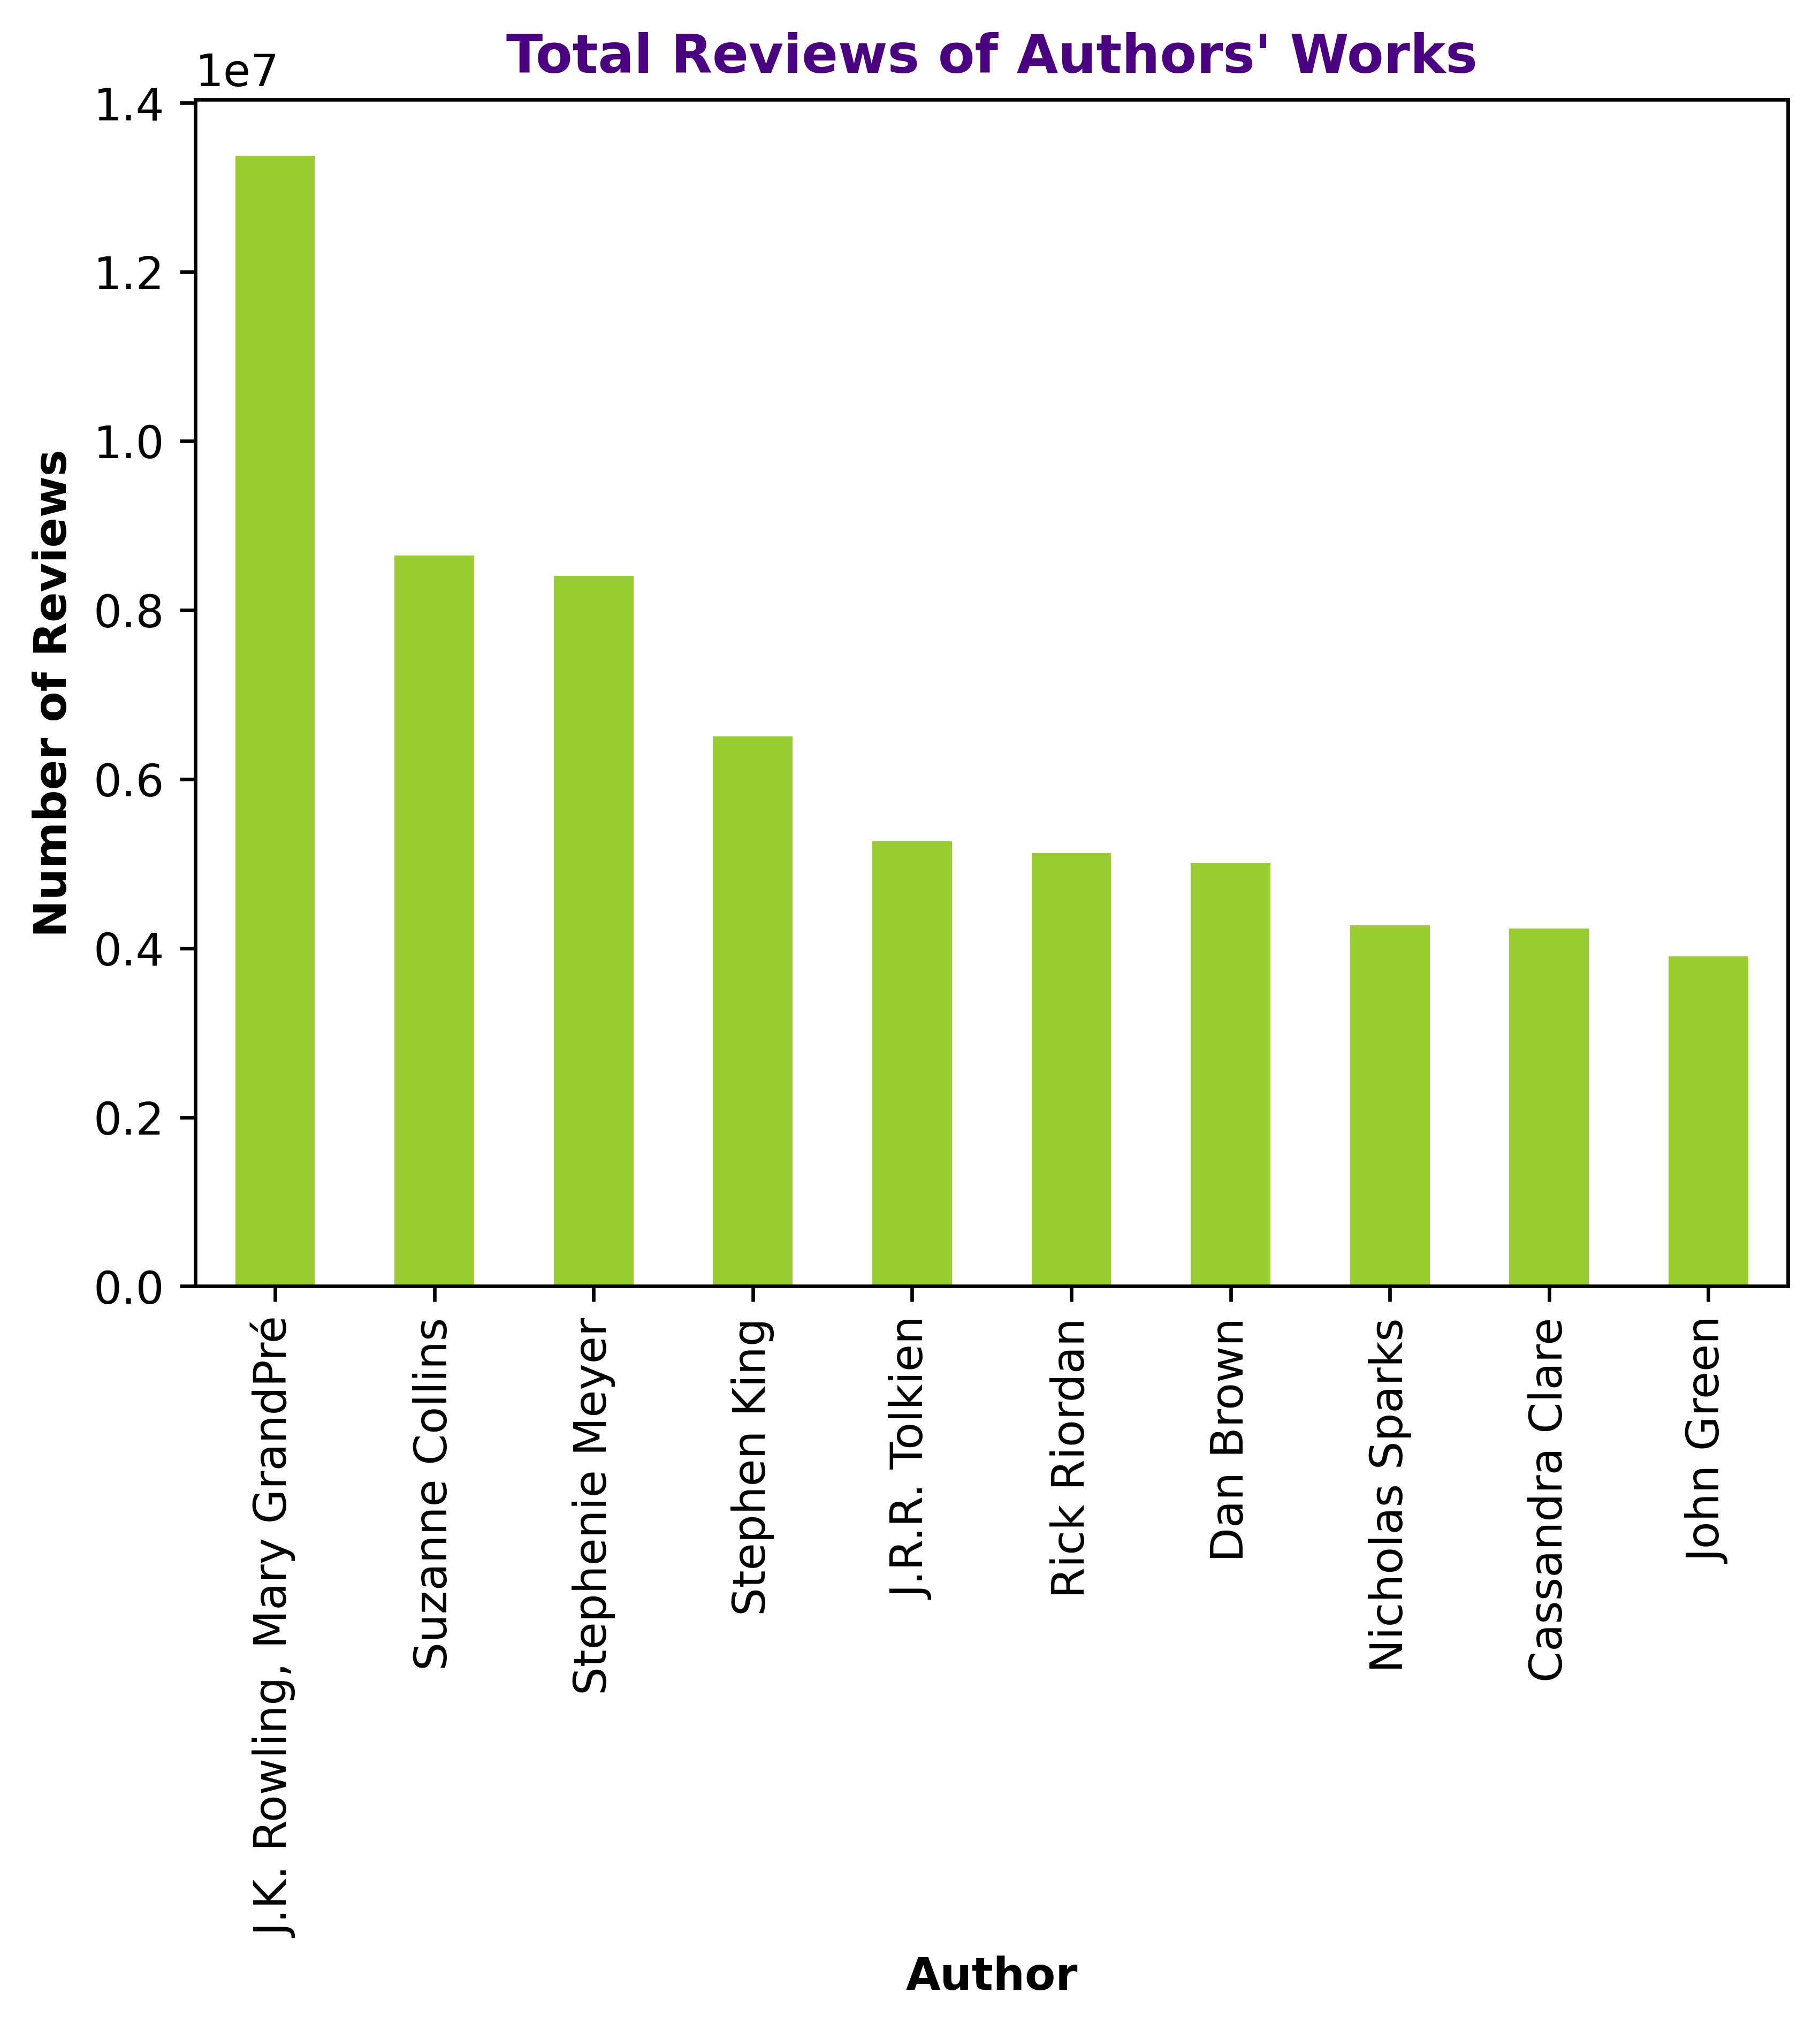

In [329]:
author_ratings = b.groupby('authors')['ratings_count'].sum().sort_values(ascending=False)
author_df.iloc[0:10].plot(kind='bar', color='yellowgreen')

plt.title("Total Reviews of Authors' Works", fontweight='bold', color='indigo')
plt.xlabel('Author', fontweight='bold')
plt.ylabel('Number of Reviews', fontweight='bold')
plt.show()

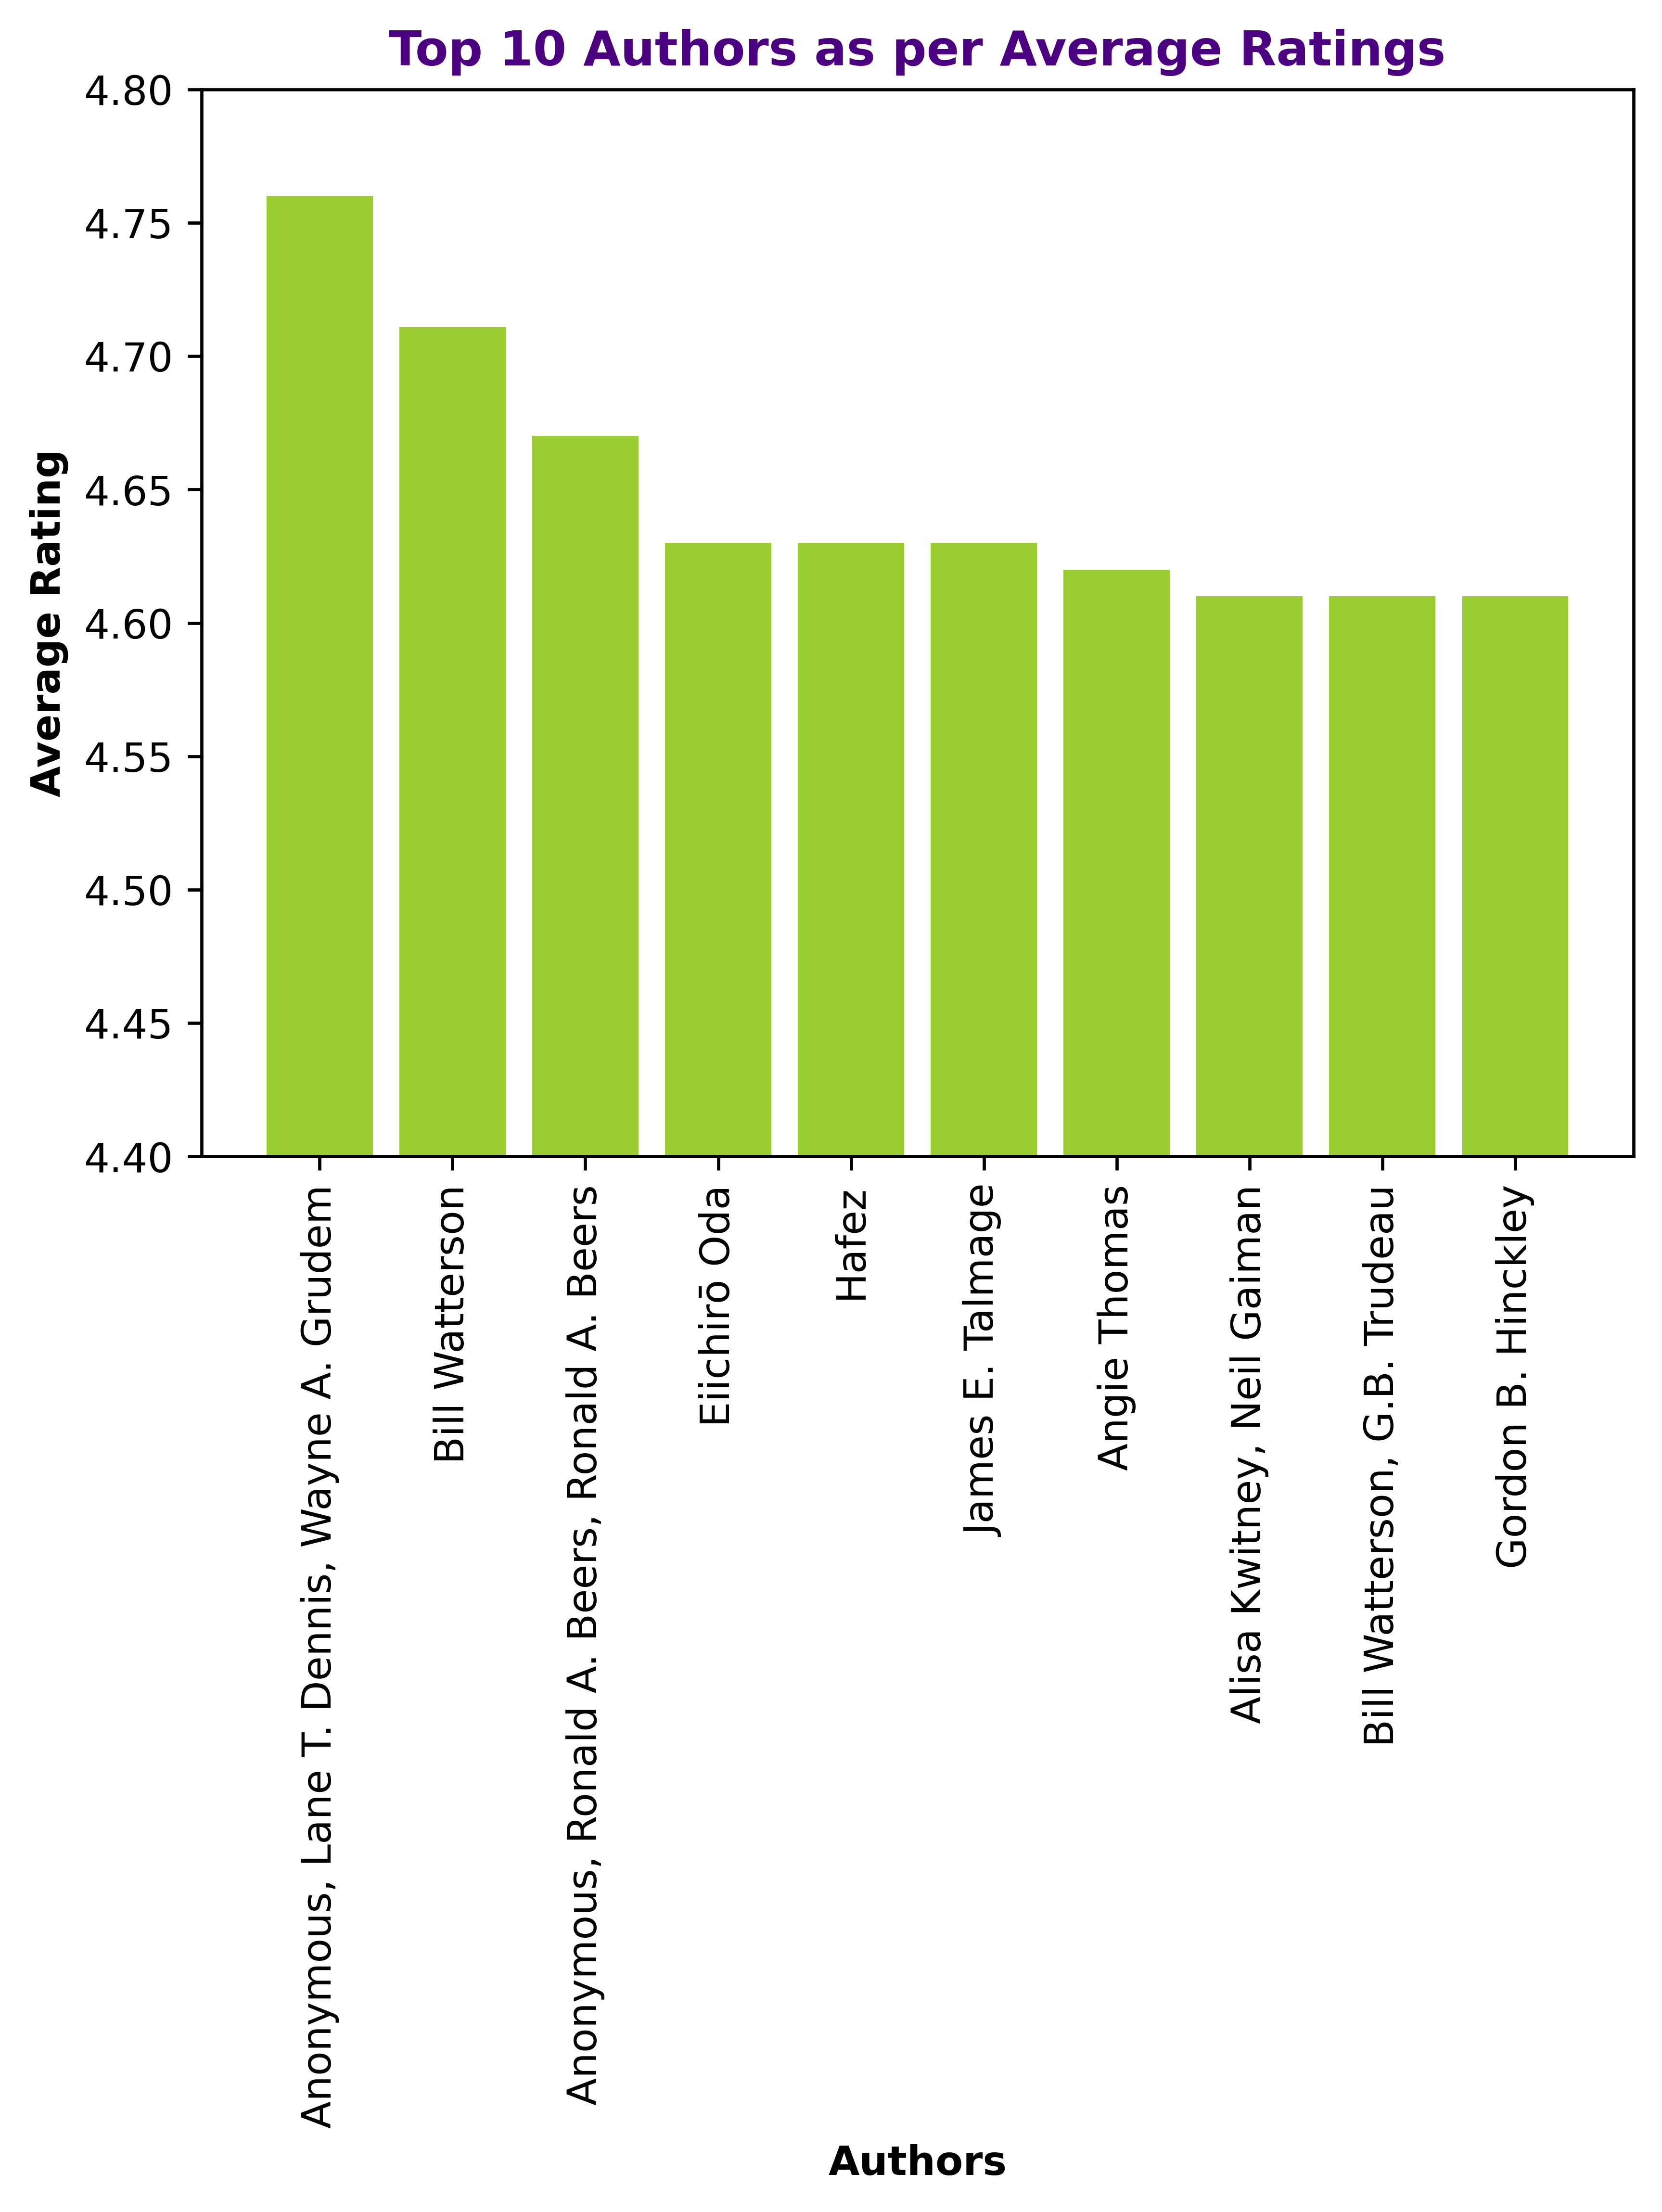

In [330]:
authors = b.groupby("authors")["average_rating"].mean()
top_authors = authors.nlargest(11)
top_authors = top_authors[top_authors.index != "Neil Gaiman, Mike Dringenberg, Chris Bachalo, Michael Zulli, Kelly Jones, Charles Vess, Colleen Doran, Malcolm Jones III, Steve Parkhouse, Daniel Vozzo, Lee Loughridge, Steve Oliff, Todd Klein, Dave McKean, Sam Kieth"]

fig, ax = plt.subplots()
ax.bar(top_authors.index, top_authors.values, color='yellowgreen')
ax.set_ylim((4.4,4.8))
ax.set_xlabel("Authors", fontweight='bold')
ax.set_ylabel("Average Rating", fontweight='bold')
ax.set_title("Top 10 Authors as per Average Ratings", fontweight='bold', color='indigo')
plt.xticks(rotation=90)
plt.show()

---

**Hypothesis D -** In a dataset of 10,000 books, surely the top 100 books would have an average rating of above 4.0 stars. 

---

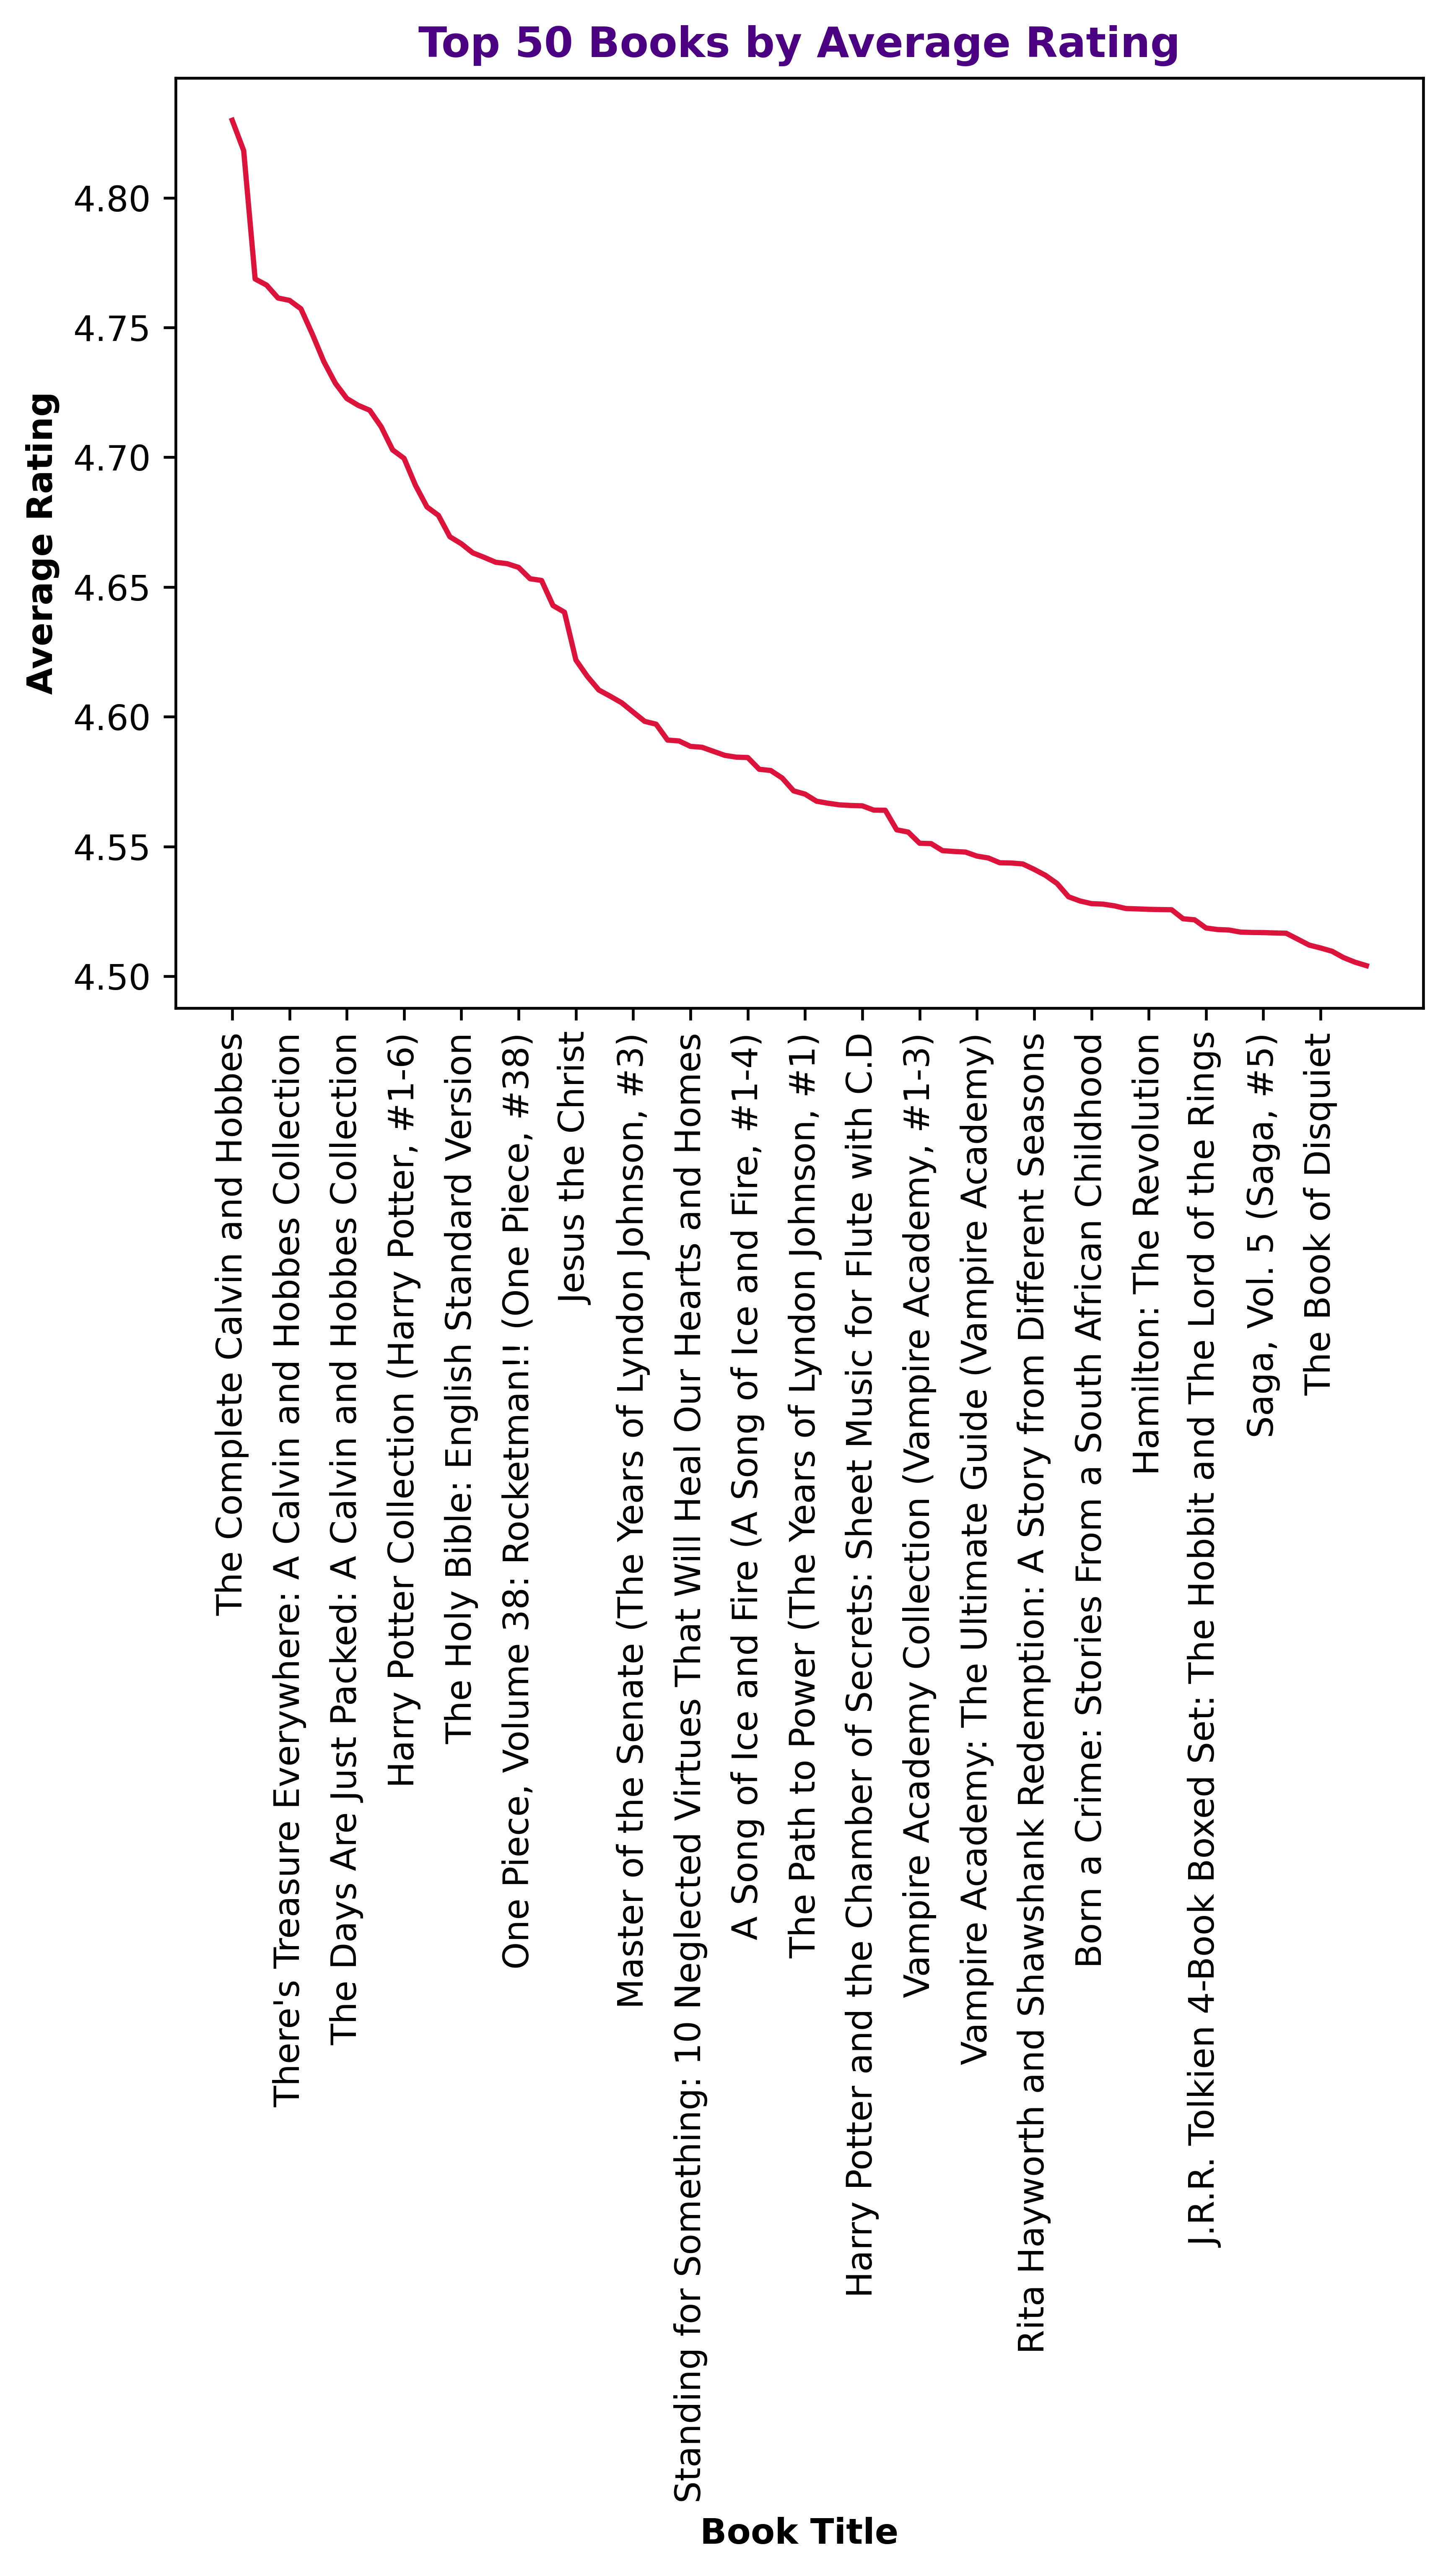

In [349]:
data = pd.merge(b, r, on='book_id')
avg_ratings = data.groupby('title')['rating'].mean().reset_index()
top_books = avg_ratings.sort_values(by='rating', ascending=False).head(100)

plt.plot(top_books['title'], top_books['rating'], color='crimson')
plt.xticks(rotation=90)
plt.xlabel('Book Title', fontweight='bold')
plt.ylabel('Average Rating', fontweight='bold')
plt.title('Top 50 Books by Average Rating', fontweight='bold', color='indigo')
tick_positions = range(0, len(top_books), 5)
tick_labels = top_books['title'].iloc[tick_positions]
plt.xticks(tick_positions, tick_labels)
plt.show()

---

**Question E -** What is the trend in the number of books published every year?

---

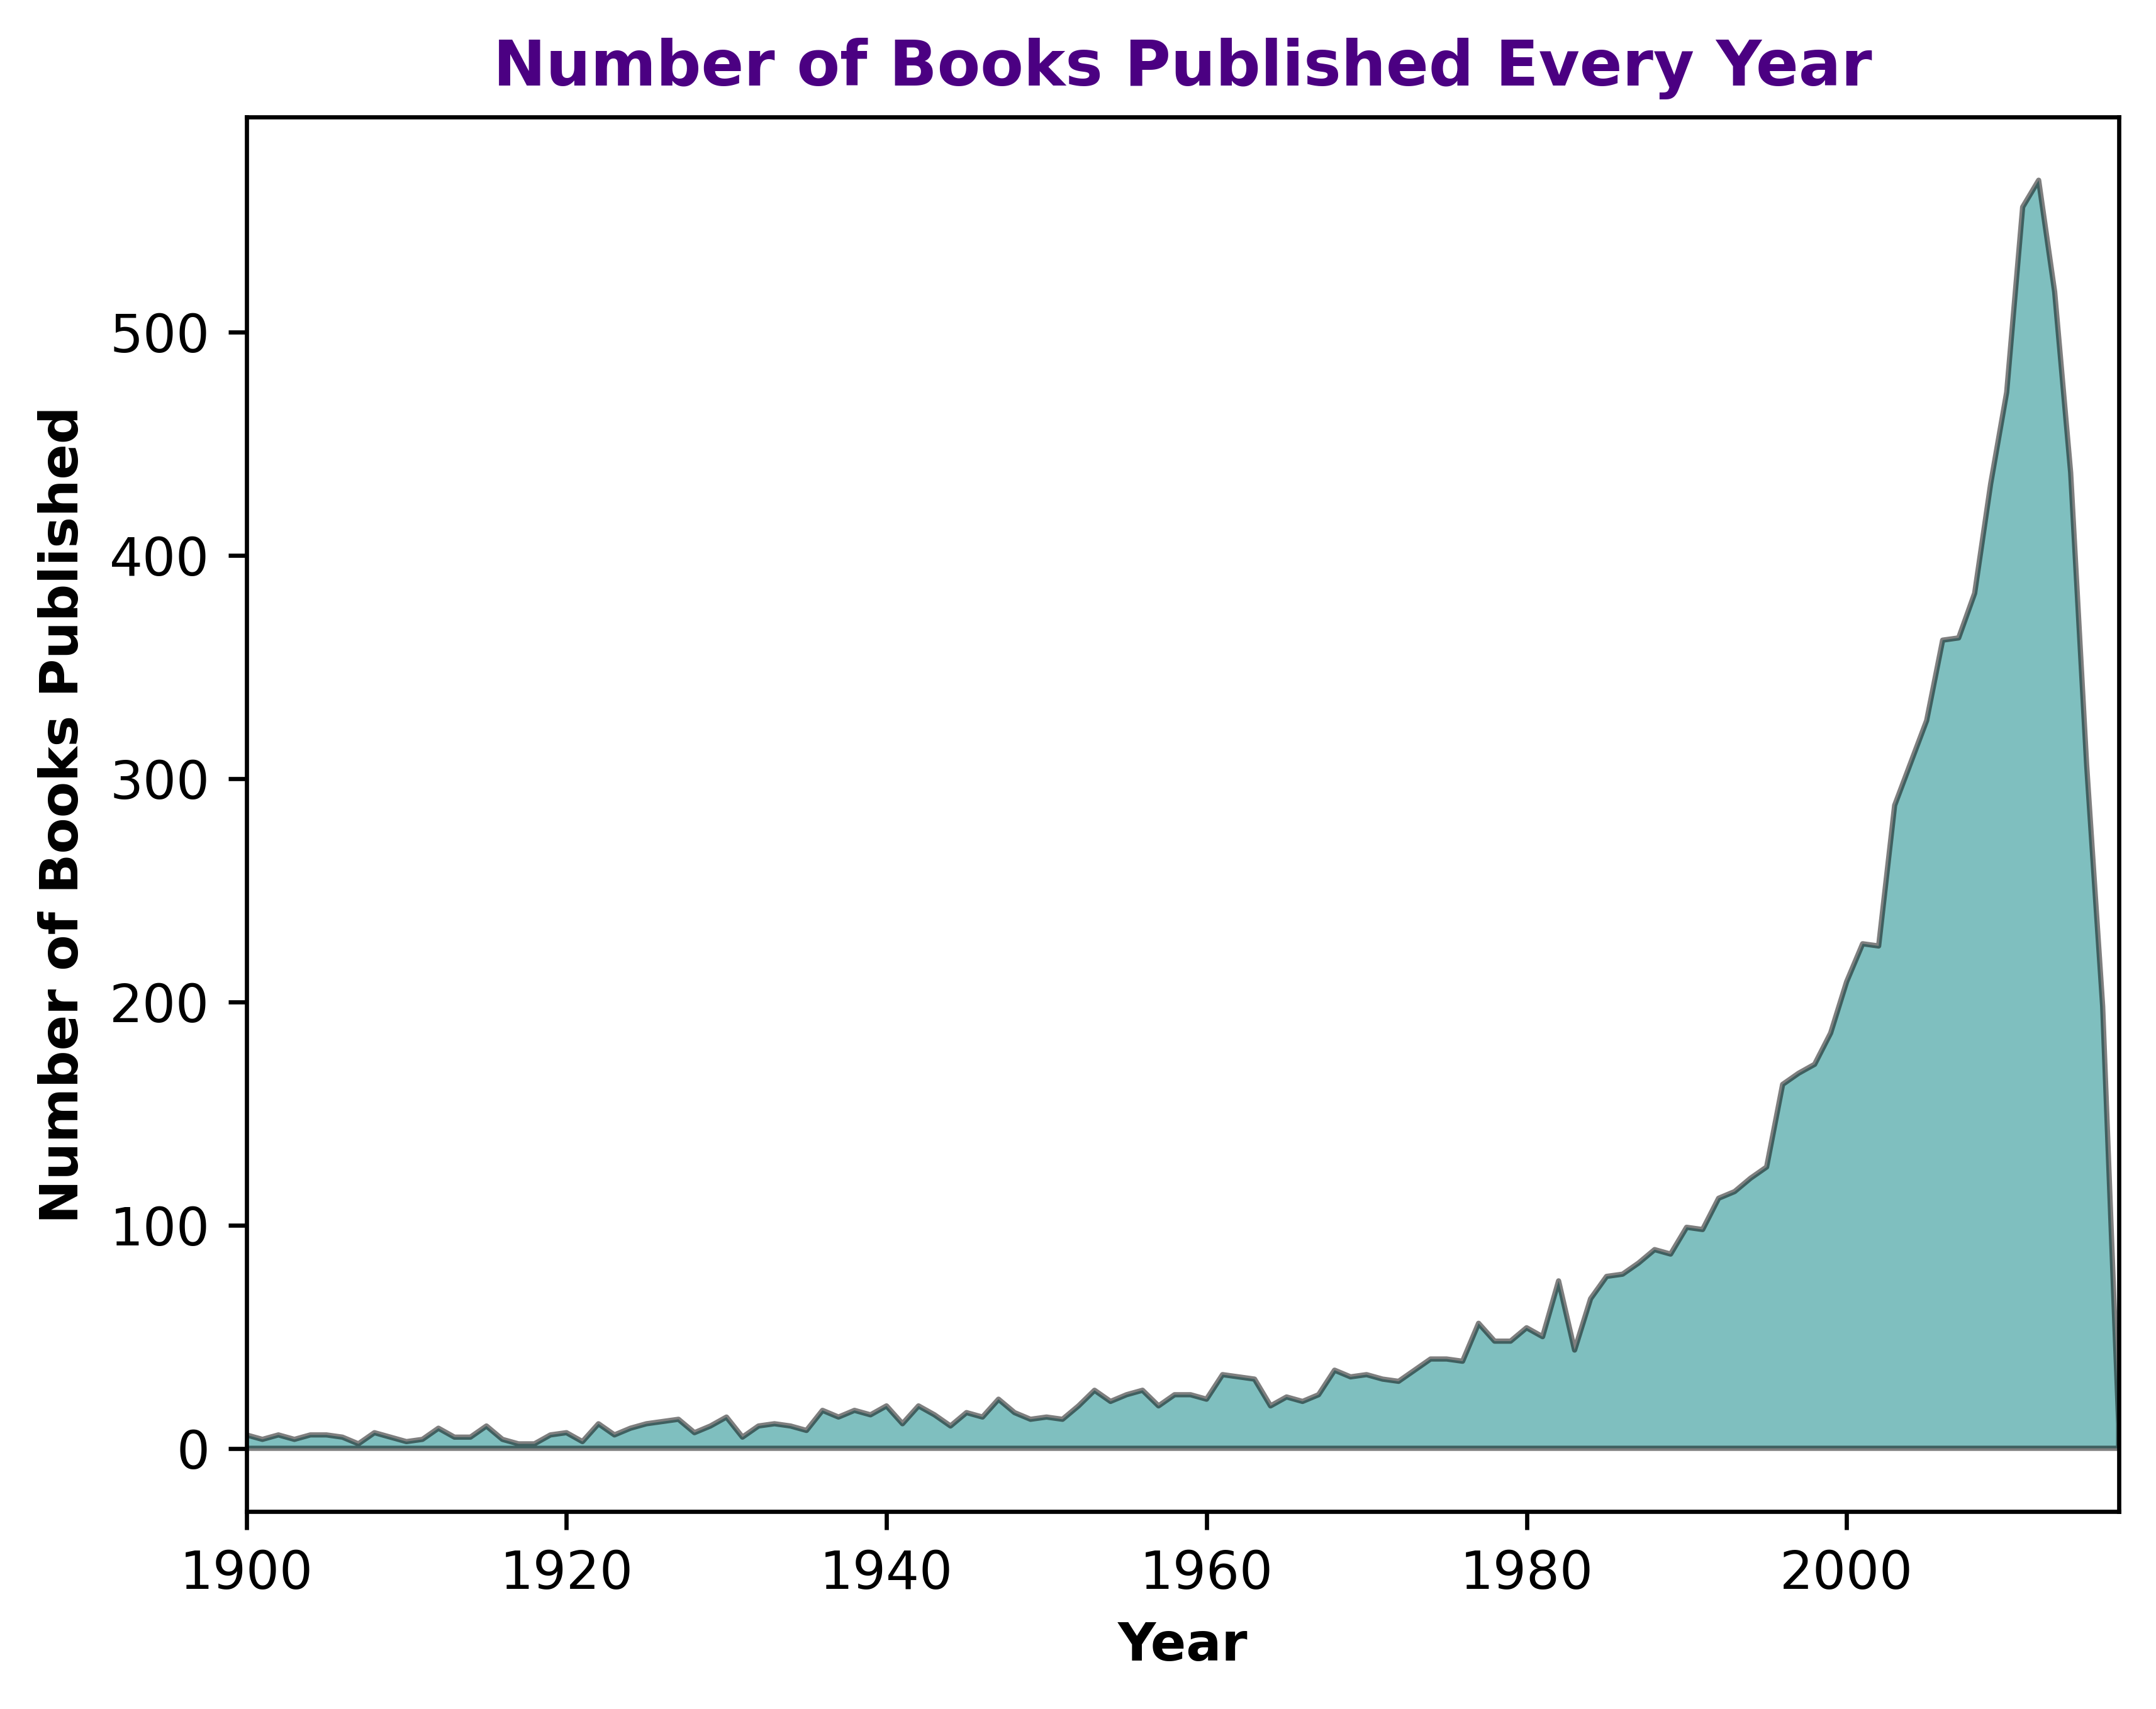

In [347]:
b['original_publication_year'] = pd.to_datetime(books['original_publication_year'], format='%Y', errors='coerce')
books_per_year = b['original_publication_year'].value_counts().sort_index()

plt.fill_between(books_per_year.index.year, 0, books_per_year.values, color='teal', edgecolor='black', alpha=0.5)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Books Published', fontweight='bold')
plt.title('Number of Books Published Every Year', fontweight='bold', color='indigo')
plt.xlim(1900, 2017)
plt.show()